In [60]:
import os
import shutil
from params import *
# from ml_logic.dataset import load_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import data, io
from PIL import Image
from sklearn.cluster import KMeans


pd.set_option('display.max_rows', 500)
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.utils import image_dataset_from_directory

In [6]:
full_data_dir = "../data/city_countryside"
full_ds = image_dataset_from_directory(
    full_data_dir,
    labels='inferred',
    label_mode='int',
    seed=123,
    image_size=(66,153)
)

train_ds = image_dataset_from_directory(
    full_data_dir,
    labels='inferred',
    label_mode='int',
    seed=123,
    image_size=(66,153),
    validation_split=0.3,
    subset='training'
    )

val_ds = image_dataset_from_directory(
    full_data_dir,
    labels='inferred',
    label_mode='int',
    seed=123,
    image_size=(66,153),
    validation_split=0.3,
    subset = 'validation'
    )

Found 2604 files belonging to 2 classes.
Found 2604 files belonging to 2 classes.
Using 1823 files for training.
Found 2604 files belonging to 2 classes.
Using 781 files for validation.


['city', 'countryside']


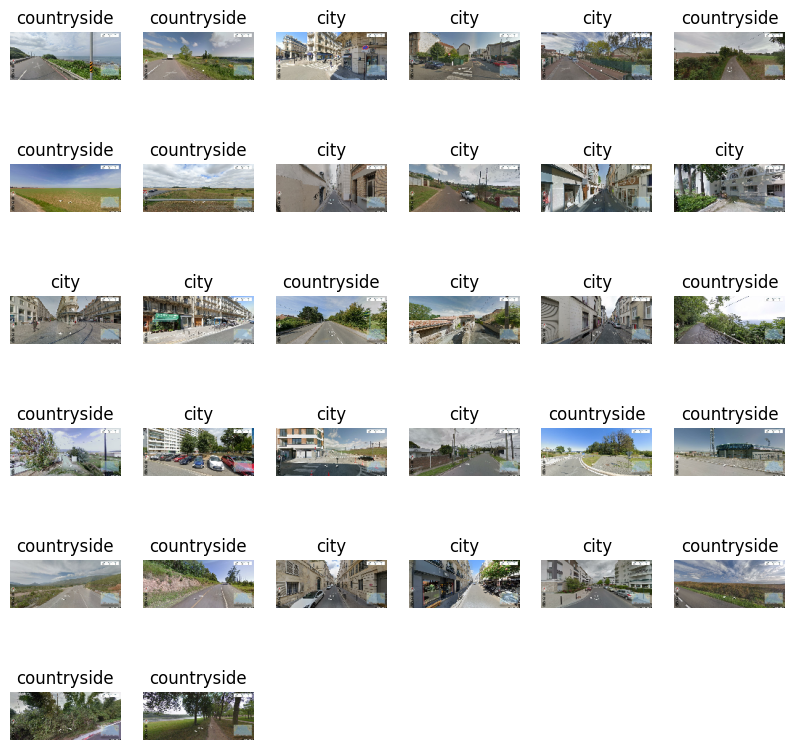

In [7]:
class_names = full_ds.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in full_ds.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

(<matplotlib.image.AxesImage at 0x7fc147f2d7b0>,
 <matplotlib.image.AxesImage at 0x7fc147f2dae0>)

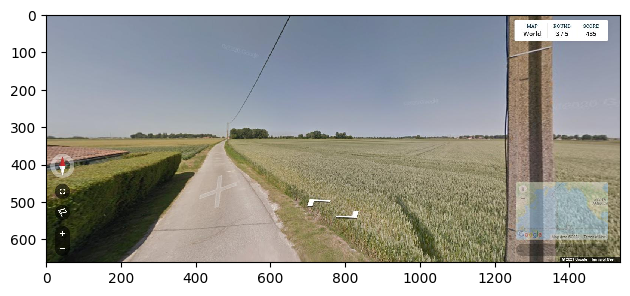

In [22]:
img = io.imread('../data/city_countryside/city/canvas_1629258026.jpg')
img_green = io.imread('../data/city_countryside/countryside/canvas_1629264450.jpg')
io.imshow(img), io.imshow(img_green)

In [ ]:
io.imshow()

In [29]:
average = img.mean(axis=0).mean(axis=0)
pixels = np.float32(img.reshape(-1, 3))

n_colors = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)

dominant = palette[np.argmax(counts)]


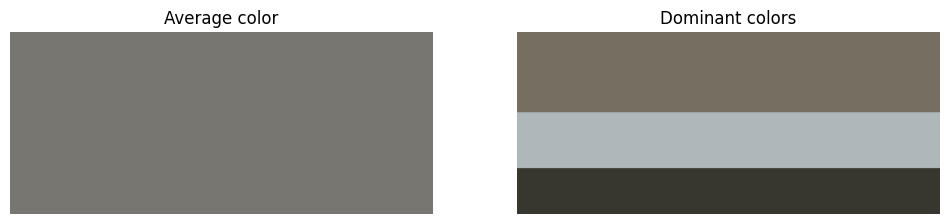

In [30]:
avg_patch = np.ones(shape=img.shape, dtype=np.uint8)*np.uint8(average)

indices = np.argsort(counts)[::-1]
freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
rows = np.int_(img.shape[0]*freqs)

dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.imshow(avg_patch)
ax0.set_title('Average color')
ax0.axis('off')
ax1.imshow(dom_patch)
ax1.set_title('Dominant colors')
ax1.axis('off')
plt.show(fig)

In [27]:
average = img_green.mean(axis=0).mean(axis=0)
pixels = np.float32(img_green.reshape(-1, 3))

n_colors = 3
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)

dominant = palette[np.argmax(counts)]


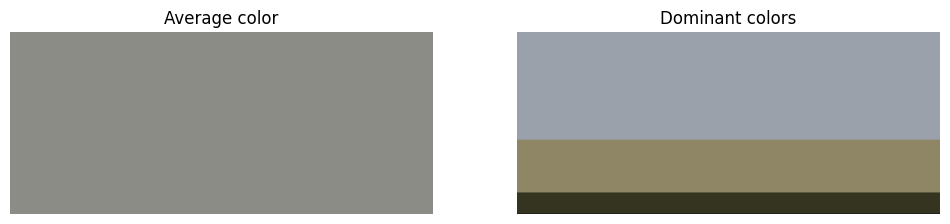

In [28]:
avg_patch = np.ones(shape=img_green.shape, dtype=np.uint8)*np.uint8(average)

indices = np.argsort(counts)[::-1]
freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
rows = np.int_(img_green.shape[0]*freqs)

dom_patch = np.zeros(shape=img_green.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
ax0.imshow(avg_patch)
ax0.set_title('Average color')
ax0.axis('off')
ax1.imshow(dom_patch)
ax1.set_title('Dominant colors')
ax1.axis('off')
plt.show(fig)

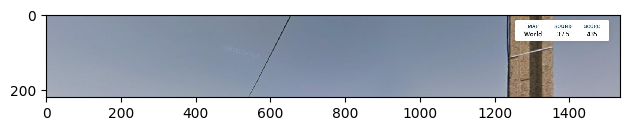

In [45]:
img_top = img_green[:220]
img_mid = img_green[220:440]
img_low = img_green[440:660]

io.imshow(img_top)

/home/kenjiro/.pyenv/versions/3.10.6/envs/geo_learning/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


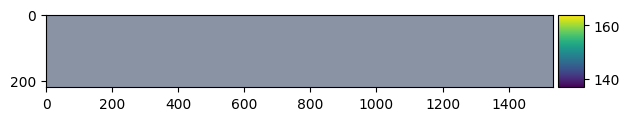

In [42]:
average_top = img_top.mean(axis=0).mean(axis=0)
avg_patch_top = np.ones(shape=img_top.shape, dtype=np.uint8)*np.uint8(average_top)
io.imshow(avg_patch_top)

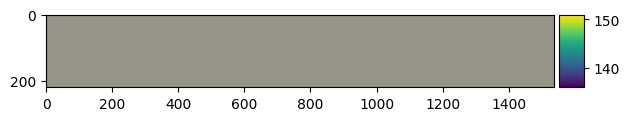

In [43]:
average_mid = img_mid.mean(axis=0).mean(axis=0)
avg_patch_mid = np.ones(shape=img_mid.shape, dtype=np.uint8)*np.uint8(average_mid)
io.imshow(avg_patch_mid)

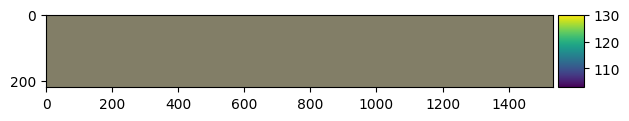

In [44]:
average_low = img_low.mean(axis=0).mean(axis=0)
avg_patch_low = np.ones(shape=img_low.shape, dtype=np.uint8)*np.uint8(average_low)
io.imshow(avg_patch_low)

numpy.ndarray

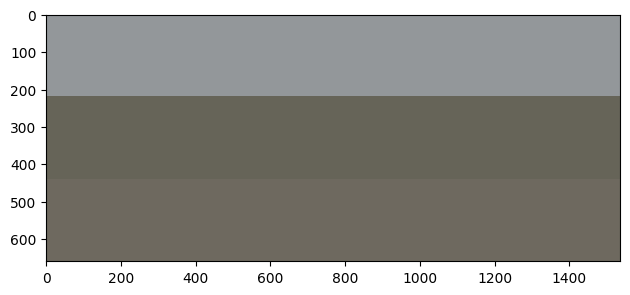

In [55]:
def make_average_slices(img):
    img_top = img[:220]
    img_mid = img[220:440]
    img_low = img[440:660]
    average_top = img_top.mean(axis=0).mean(axis=0)
    avg_patch_top = np.ones(shape=img_top.shape, dtype=np.uint8)*np.uint8(average_top)
    average_mid = img_mid.mean(axis=0).mean(axis=0)
    avg_patch_mid = np.ones(shape=img_mid.shape, dtype=np.uint8)*np.uint8(average_mid)
    average_low = img_low.mean(axis=0).mean(axis=0)
    avg_patch_low = np.ones(shape=img_low.shape, dtype=np.uint8)*np.uint8(average_low)
    img_average = np.concatenate((avg_patch_top,avg_patch_mid,avg_patch_low),axis=0)
    io.imshow(img_average)
    return img_average
img_average = make_average_slices(img)
type(img_average)


In [58]:
im = Image.fromarray(img_average)
im.save("test_average.jpeg")